## Reconstruction Triangulation Sandbox

Author: Dane

### Purpose
Create simple samples that can be used to understand the algorithms and challenges inherent to the structure from motion problem using toy examples, exposing functionality



In [11]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import csv

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
class Snapshot:
    def __init__(self, file_prefix):
        img_path = './samples/' + file_prefix + '.jpg'
        self.img = np.asarray(Image.open(img_path))
        
        csv_path = './samples/' + file_prefix + '.csv'
        self.pts = []
        with open(csv_path, newline='\r\n') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                x = int(row[0])
                y = int(row[1])
                self.pts.append(Point(x, y))

def display_2_snapshots(snap_a, snap_b):
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(snap_a.img)
    axarr[0,0].set_axis_off()
    axarr[0,0].set_title('First Image', y=-.18)
    axarr[0,1].imshow(snap_b.img)
    axarr[0,1].set_axis_off()
    axarr[0,1].set_title('Second Image', y=-.18)
    
    axarr[1,0].imshow(snap_a.img)
    axarr[1,0].set_axis_off()
    axarr[1,0].set_title('First Key Points', y=-.18)
    a_x = [pt.x for pt in snap_a.pts]
    a_y = [pt.y for pt in snap_a.pts]
    axarr[1,0].scatter(a_x, a_y, marker="x")
    
    axarr[1,1].imshow(snap_b.img)
    axarr[1,1].set_axis_off()
    axarr[1,1].set_title('Second Key Points', y=-.18)    
    b_x = [pt.x for pt in snap_b.pts]
    b_y = [pt.y for pt in snap_b.pts]
    axarr[1,1].scatter(b_x, b_y, marker="x")
    
def hartley_normalization(all_snapshot_pts):
    
    # Find new centroid
    avg_x = 0.0
    avg_y = 0.0
    for pt in all_snapshot_pts:
        avg_x += pt.x
        avg_y += pt.y
    
    avg_x /= len(all_snapshot_pts)
    avg_y /= len(all_snapshot_pts)
    
    # Re-Center points, record avg distance from center
    normalized_pts = []
    avg_dist_from_center = 0.0
    for pt in all_snapshot_pts:
        n_x = pt.x - avg_x
        n_y = pt.y - avg_y
        normalized_pts.append( Point(n_x, n_y) )

        avg_dist_from_center += ( np.sqrt(n_x*n_x + n_y*n_y) )
    
    avg_dist_from_center /= ( len(all_snapshot_pts) )
    print('New avg distance from center:', avg_dist_from_center)
    
    # Scale points so avg pt distance becomes 'sqrt(2)'
    scale_factor = np.sqrt(2) / avg_dist_from_center
    for i in range( (len(normalized_pts)) ):
        normalized_pts[i].x *= scale_factor
        normalized_pts[i].y *= scale_factor
        
    return normalized_pts    

## Tissue Box Correspondence Example

New avg distance from center: 772.8965731497799
1.414213562373095
-1.7766948603072177 -0.857058571130691


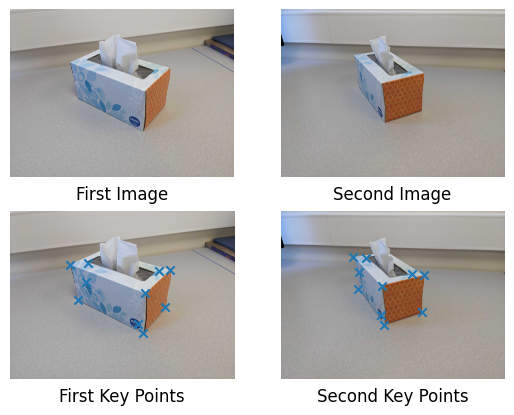

In [14]:
box_a = Snapshot('BOX_A')
box_b = Snapshot('BOX_B')

#hn_pts_a = hartley_normalization(box_a.pts)

display_2_snapshots(box_a, box_b)

## Camera Calibration and Triangulation Example